In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [2]:
Sasaki_DNA_rep1 = pd.read_csv('../data/counts_20230704/Sahu_DNA_rep1_counts.txt', sep='\t', names=['sequence', 'count'])
Sasaki_DNA_rep2 = pd.read_csv('../data/counts_20230704/Sahu_DNA_rep2_counts.txt', sep='\t', names=['sequence', 'count'])
Sasaki_RNA_rep1 = pd.read_csv('../data/counts_20230704/Sahu_RNA_rep1_counts.txt', sep='\t', names=['sequence', 'count', 'collapsed_count'])
Sasaki_RNA_rep2 = pd.read_csv('../data/counts_20230704/Sahu_RNA_rep2_counts.txt', sep='\t', names=['sequence', 'count', 'collapsed_count'])
ori_DNA_rep1 = pd.read_csv('../data/counts_20230704/STARR_DNA_rep1_counts.txt', sep='\t', names=['sequence', 'count'])
ori_DNA_rep2 = pd.read_csv('../data/counts_20230704/STARR_DNA_rep2_counts.txt', sep='\t', names=['sequence', 'count'])
ori_RNA_rep1 = pd.read_csv('../data/counts_20230704/STARR_RNA_rep1_counts.txt', sep='\t', names=['sequence', 'count', 'collapsed_count'])
ori_RNA_rep2 = pd.read_csv('../data/counts_20230704/STARR_RNA_rep2_counts.txt', sep='\t', names=['sequence', 'count', 'collapsed_count'])

samples = {'Sasaki_DNA_rep1': Sasaki_DNA_rep1, 'Sasaki_DNA_rep2': Sasaki_DNA_rep2, 'ori_DNA_rep1': ori_DNA_rep1, 'ori_DNA_rep2': Sasaki_DNA_rep2, 'Sasaki_RNA_rep1': Sasaki_RNA_rep1, 'Sasaki_RNA_rep2': Sasaki_RNA_rep2, 'ori_RNA_rep1': ori_RNA_rep1, 'ori_RNA_rep2': ori_RNA_rep2}
counts = pd.concat(samples, names=['sample'])
counts = counts.reset_index(level=0)

Look at stats for all samples.

In [3]:
counts.groupby('sample').describe()

count                                                      \
                    count         mean           std  min   25%    50%    75%   
sample                                                                          
Sasaki_DNA_rep1  819321.0    23.653578     20.668612  0.0   9.0   19.0   33.0   
Sasaki_DNA_rep2  823743.0    26.155507     22.974827  0.0  10.0   21.0   36.0   
Sasaki_RNA_rep1   40865.0  2038.296293  70123.308142  1.0   1.0    1.0    1.0   
Sasaki_RNA_rep2   53108.0  1750.256327  64209.529029  1.0   1.0    1.0    1.0   
ori_DNA_rep1     839776.0    30.587678     26.926581  0.0  11.0   25.0   43.0   
ori_DNA_rep2     823743.0    26.155507     22.974827  0.0  10.0   21.0   36.0   
ori_RNA_rep1     459634.0   275.670588    348.737412  1.0   3.0  158.0  417.0   
ori_RNA_rep2     652092.0   233.932499    259.752499  1.0  34.0  162.0  334.0   

                           collapsed_count                                   \
                       max           count       mean         std  min  25%   
sample                                                                        
Sasaki_DNA_rep1      424.0             0.0        NaN         NaN  NaN  NaN   
Sasaki_DNA_rep2      496.0             0.0        NaN         NaN  NaN  NaN   
Sasaki_RNA_rep1  6652075.0         40865.0  10.148807  141.656071  1.0  1.0   
Sasaki_RNA_rep2  3932973.0         53108.0   6.753502  109.089073  1.0  1.0   
ori_DNA_rep1         445.0             0.0        NaN         NaN  NaN  NaN   
ori_DNA_rep2         496.0             0.0        NaN         NaN  NaN  NaN   
ori_RNA_rep1        7680.0        459634.0  22.953850   25.867260  1.0  2.0   
ori_RNA_rep2       10461.0        652092.0  20.444181   20.723276  1.0  5.0   

                                     
                  50%   75%     max  
sample                               
Sasaki_DNA_rep1   NaN   NaN     NaN  
Sasaki_DNA_rep2   NaN   NaN     NaN  
Sasaki_RNA_rep1   1.0   1.0  4112.0  
Sasaki_RNA_rep2   1.0   1.0  3861.0  
ori_DNA_rep1      NaN   NaN     NaN  
ori_DNA_rep2      NaN   NaN     NaN  
ori_RNA_rep1     16.0  34.0   492.0  
ori_RNA_rep2     15.0  29.0   649.0

Look at distribution of read counts.

c:\Users\nmateyko\.venv\starr-seq\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


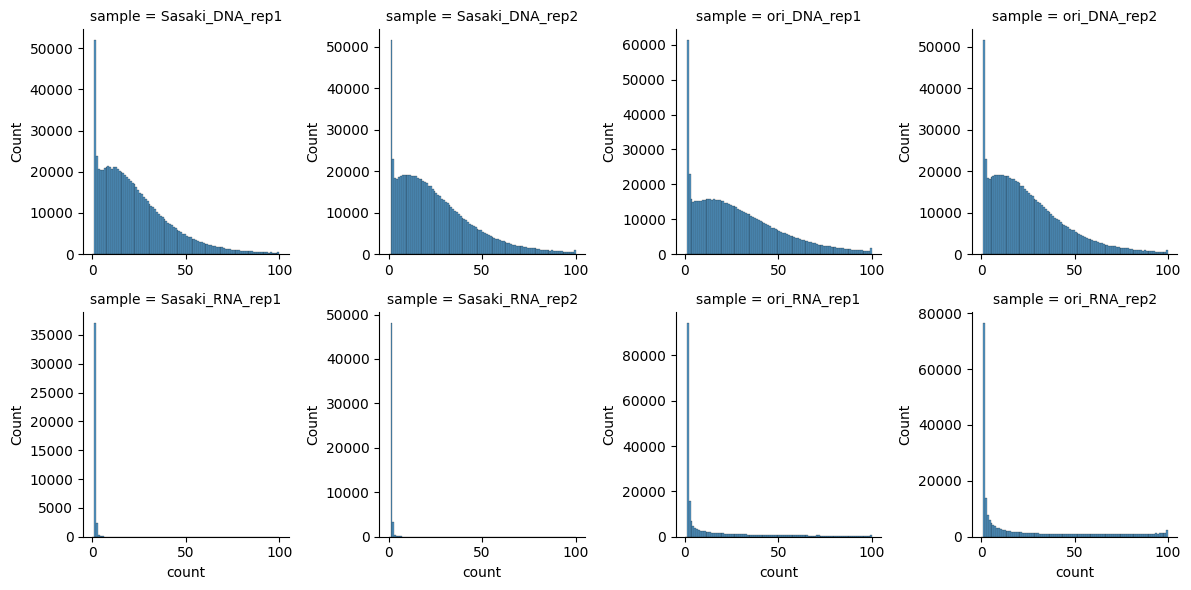

In [4]:
g = sns.FacetGrid(data=counts, col='sample', sharex=False, sharey=False, col_wrap=4)
g.map(sns.histplot, 'count', binrange=[0, 100], binwidth=1)

Collapsed counts.

c:\Users\nmateyko\.venv\starr-seq\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


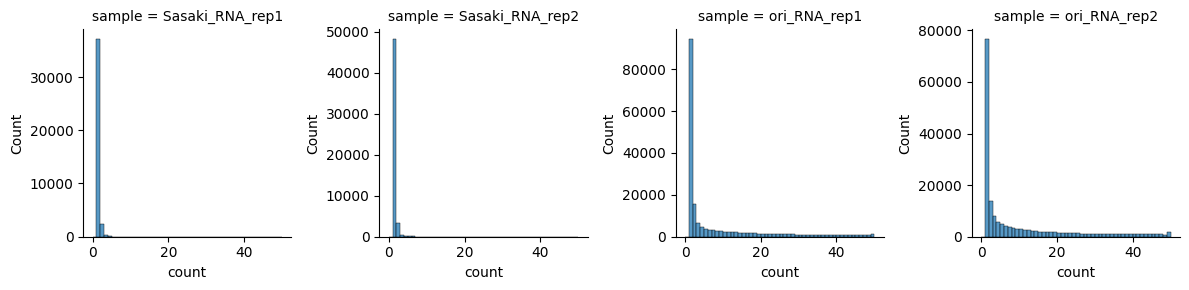

In [5]:
g = sns.FacetGrid(data=counts, col='sample', sharex=False, sharey=False, col_order=['Sasaki_RNA_rep1', 'Sasaki_RNA_rep2', 'ori_RNA_rep1', 'ori_RNA_rep2'])
g.map(sns.histplot, 'count', binrange=[0, 50], binwidth=1)

Look at number of sequences in common between replicates.

In [6]:
Sasaki_DNA_joined = Sasaki_DNA_rep1.merge(Sasaki_DNA_rep2, on='sequence', how='inner', suffixes=('_rep1', '_rep2'))
Sasaki_RNA_joined = Sasaki_RNA_rep1.merge(Sasaki_RNA_rep2, on='sequence', how='inner', suffixes=('_rep1', '_rep2'))
ori_DNA_joined = ori_DNA_rep1.merge(ori_DNA_rep2, on='sequence', how='inner', suffixes=('_rep1', '_rep2'))
ori_RNA_joined = ori_RNA_rep1.merge(ori_RNA_rep2, on='sequence', how='inner', suffixes=('_rep1', '_rep2'))
samples = {'Sasaki_DNA': Sasaki_DNA_joined, 'Sasaki_RNA': Sasaki_RNA_joined, 'ori_DNA': ori_DNA_joined, 'ori_RNA': ori_RNA_joined}
joined_counts = pd.concat(samples, names=['sample'])
joined_counts = joined_counts.reset_index(level=0)

In [7]:
joined_counts.groupby('sample').describe()

count_rep1                                                        \
                count          mean            std  min   25%    50%    75%   
sample                                                                        
Sasaki_DNA   770897.0     25.046151      20.517093  1.0  10.0   20.0   34.0   
Sasaki_RNA     4240.0  19467.296226  216936.239338  1.0   1.0    1.0    1.0   
ori_DNA      780868.0     32.793997      26.645801  1.0  13.0   27.0   45.0   
ori_RNA      361503.0    320.079806     366.562079  1.0  16.0  253.0  463.0   

                      count_rep2                ... collapsed_count_rep1  \
                  max      count          mean  ...                  75%   
sample                                          ...                        
Sasaki_DNA      424.0   770897.0     27.840316  ...                  NaN   
Sasaki_RNA  6652075.0     4240.0  21760.177358  ...                  1.0   
ori_DNA         445.0   780868.0     52.791426  ...                  NaN   
ori_RNA        7680.0   361503.0    306.733914  ...                 38.0   

                   collapsed_count_rep2                                    \
               max                count       mean         std  min   25%   
sample                                                                      
Sasaki_DNA     NaN                  0.0        NaN         NaN  NaN   NaN   
Sasaki_RNA  4112.0               4240.0  67.061085  378.256494  1.0   1.0   
ori_DNA        NaN                  0.0        NaN         NaN  NaN   NaN   
ori_RNA      492.0             361503.0  26.548018   23.186990  1.0  10.0   

                                
             50%   75%     max  
sample                          
Sasaki_DNA   NaN   NaN     NaN  
Sasaki_RNA   1.0   1.0  3861.0  
ori_DNA      NaN   NaN     NaN  
ori_RNA     21.0  37.0   649.0  

[4 rows x 32 columns]

In [8]:
joined_counts.tail()

,sample,sequence,count_rep1,count_rep2,collapsed_count_rep1,collapsed_count_rep2
361498,ori_RNA,CTATATAACGACATTTCATTACCCGGCTGTGCACCCTGAGGCGGAC...,1,125,1.0,9.0
361499,ori_RNA,TTATTTACGGTTCTCAGTCTACTAAGCTAGAACAATTGTGATCGTA...,833,3,59.0,3.0
361500,ori_RNA,CGATATCTACCTTAAAATCCTCGGAAAATGATGAATGCGGCGCGAG...,48,465,10.0,55.0
361501,ori_RNA,TCAATGGCGATGGCAGTATATCTTCGGGCTTTTATTAAGTGGTCTG...,14,278,5.0,29.0
361502,ori_RNA,TTCCCGGTACTTCTCATGTGTCATGATAGTGGGGTTTTACTACAGA...,1,378,1.0,31.0


Look at correlation between replicates.

c:\Users\nmateyko\.venv\starr-seq\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


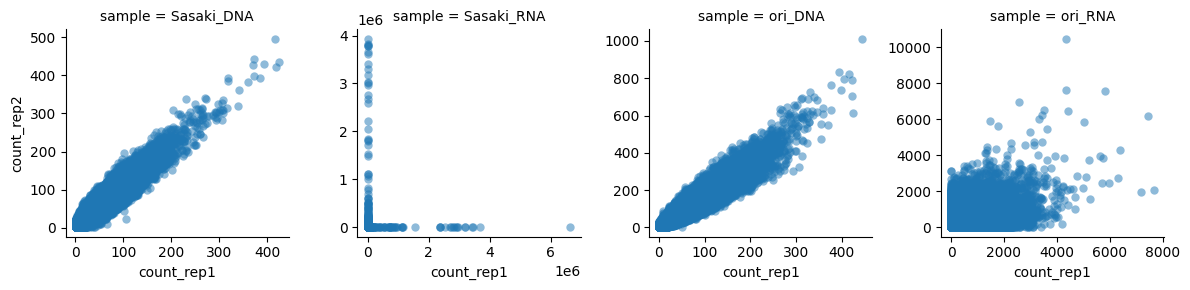

In [9]:
g = sns.FacetGrid(data=joined_counts, col='sample', sharex=False, sharey=False)
g.map(sns.scatterplot, 'count_rep1', 'count_rep2', linewidth=0, alpha=0.5)

In [10]:
def get_pearson(sample, variable):
    rep1_counts = joined_counts.loc[joined_counts['sample'] == sample][f'{variable}_rep1']
    rep2_counts = joined_counts.loc[joined_counts['sample'] == sample][f'{variable}_rep2']
    return stats.pearsonr(rep1_counts, rep2_counts)

In [11]:
sample_names = ['Sasaki_DNA', 'Sasaki_RNA', 'ori_DNA', 'ori_RNA']
for name in sample_names:
    cor, p = get_pearson(name, 'count')
    print(f'{name}: Pearson r = {cor}, p-value = {p}')

Sasaki_DNA: Pearson r = 0.9267801925435093, p-value = 0.0
Sasaki_RNA: Pearson r = -0.008410582300500149, p-value = 0.5840313921338268
ori_DNA: Pearson r = 0.9389412333112275, p-value = 0.0
ori_RNA: Pearson r = 0.20574367890169068, p-value = 0.0


c:\Users\nmateyko\.venv\starr-seq\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


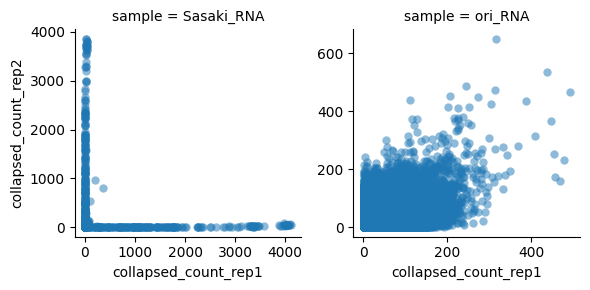

In [12]:
g = sns.FacetGrid(data=joined_counts, col='sample', col_order=['Sasaki_RNA', 'ori_RNA'], sharex=False, sharey=False)
g.map(sns.scatterplot, 'collapsed_count_rep1', 'collapsed_count_rep2', linewidth=0, alpha=0.5)

In [13]:
sample_names = ['Sasaki_RNA', 'ori_RNA']
for name in sample_names:
    cor, p = get_pearson(name, 'collapsed_count')
    print(f'{name}: Pearson r = {cor}, p-value = {p}')

Sasaki_RNA: Pearson r = -0.017946663389725184, p-value = 0.24266497840477536
ori_RNA: Pearson r = 0.24253372534709114, p-value = 0.0
